In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.ticker as mticker
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#loading the dataset
df = pd.read_csv("allschools.csv")
df.head()

,Outstanding_Loan,Branch,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Product_Name,Sub_Product,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,Holiday_Loan,End_Use,Loan_Classification,Default,Risk
0,69530,nairobi branch,236,12,430000,9,bridge,school upgrade loan,28,14,20,4050,955800,False,Open,Standard,1,Defaulters
1,134305,nairobi branch,271,12,500000,36,bridge,school construction,26,13,23,0,0,False,Done,Standard,1,Defaulters
2,140746,nairobi branch,370,17,1000000,36,flexi,school construction,24,11,22,6000,2220000,False,Done,Standard,1,Defaulters
3,291096,nairobi branch,304,15,1000000,13,flexi,school construction,26,17,20,0,0,False,Open,Standard,1,Defaulters
4,108596,nairobi branch,416,13,350000,12,bridge,school construction,28,30,32,0,0,False,Done,Standard,1,Defaulters


In [3]:
features_df=df[['Outstanding_Loan','Student_Count','Net_Disbursed','Teacher_Count','Tenure','Interest_Rate','Vintage','Annual_Fee','ST_Ratio','Default']]
features_df

,Outstanding_Loan,Student_Count,Net_Disbursed,Teacher_Count,Tenure,Interest_Rate,Vintage,Annual_Fee,ST_Ratio,Default
0,69530,236,430000,12,9,28,14,4050,20,1
1,134305,271,500000,12,36,26,13,0,23,1
2,140746,370,1000000,17,36,24,11,6000,22,1
3,291096,304,1000000,15,13,26,17,0,20,1
4,108596,416,350000,13,12,28,30,0,32,1
...,...,...,...,...,...,...,...,...,...,...
433,500000,320,500000,14,36,39,7,12000,23,0
434,650000,145,650000,12,36,39,8,28950,12,0
435,1388000,214,354389,10,36,39,17,20250,21,0
436,10000000,335,3174167,25,60,26,7,240000,13,0


In [4]:
#Recognising categorical variables as categorical.
#Converting categorical columns to categorical 

df['Branch'] = pd.Categorical(df['Branch'])
df['Product_Name'] = pd.Categorical(df['Product_Name'])
df['Sub_Product'] = pd.Categorical(df['Sub_Product'])
df['End_Use'] = pd.Categorical(df['End_Use'])
df['Loan_Classification'] = pd.Categorical(df['Loan_Classification'])
df['Holiday_Loan'] = pd.Categorical(df['Holiday_Loan'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Outstanding_Loan     438 non-null    int64   
 1   Branch               438 non-null    category
 2   Student_Count        438 non-null    int64   
 3   Teacher_Count        438 non-null    int64   
 4   Net_Disbursed        438 non-null    int64   
 5   Tenure               438 non-null    int64   
 6   Product_Name         438 non-null    category
 7   Sub_Product          438 non-null    category
 8   Interest_Rate        438 non-null    int64   
 9   Vintage              438 non-null    int64   
 10  ST_Ratio             438 non-null    int64   
 11  Annual_Fee           438 non-null    int64   
 12  AnnualFee_Income     438 non-null    int64   
 13  Holiday_Loan         438 non-null    category
 14  End_Use              438 non-null    category
 15  Loan_Classification  43

In [5]:
# List of categorical columns to one-hot encode
categorical_columns = ['Branch', 'Product_Name', 'Sub_Product','Holiday_Loan', 'End_Use', 'Loan_Classification']

# Perform one-hot encoding on the categorical columns
encoded_df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)

encoded_df


,Outstanding_Loan,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,...,Sub_Product_techy loan,Holiday_Loan_False,Holiday_Loan_True,End_Use_Done,End_Use_Open,End_Use_Pending,Loan_Classification_Consolidated,Loan_Classification_Refinanced,Loan_Classification_Restructured,Loan_Classification_Standard
0,69530,236,12,430000,9,28,14,20,4050,955800,...,False,True,False,False,True,False,False,False,False,True
1,134305,271,12,500000,36,26,13,23,0,0,...,False,True,False,True,False,False,False,False,False,True
2,140746,370,17,1000000,36,24,11,22,6000,2220000,...,False,True,False,True,False,False,False,False,False,True
3,291096,304,15,1000000,13,26,17,20,0,0,...,False,True,False,False,True,False,False,False,False,True
4,108596,416,13,350000,12,28,30,32,0,0,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,500000,320,14,500000,36,39,7,23,12000,3840000,...,False,False,True,False,True,False,False,False,False,True
434,650000,145,12,650000,36,39,8,12,28950,4197750,...,False,False,True,True,False,False,False,False,False,True
435,1388000,214,10,354389,36,39,17,21,20250,4333500,...,False,False,True,False,True,False,False,True,False,False
436,10000000,335,25,3174167,60,26,7,13,240000,80400000,...,False,False,True,False,True,False,False,False,False,True


In [6]:
encoded_df1=encoded_df.drop('Risk', axis=1)
encoded_df1

,Outstanding_Loan,Student_Count,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Annual_Fee,AnnualFee_Income,...,Sub_Product_techy loan,Holiday_Loan_False,Holiday_Loan_True,End_Use_Done,End_Use_Open,End_Use_Pending,Loan_Classification_Consolidated,Loan_Classification_Refinanced,Loan_Classification_Restructured,Loan_Classification_Standard
0,69530,236,12,430000,9,28,14,20,4050,955800,...,False,True,False,False,True,False,False,False,False,True
1,134305,271,12,500000,36,26,13,23,0,0,...,False,True,False,True,False,False,False,False,False,True
2,140746,370,17,1000000,36,24,11,22,6000,2220000,...,False,True,False,True,False,False,False,False,False,True
3,291096,304,15,1000000,13,26,17,20,0,0,...,False,True,False,False,True,False,False,False,False,True
4,108596,416,13,350000,12,28,30,32,0,0,...,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,500000,320,14,500000,36,39,7,23,12000,3840000,...,False,False,True,False,True,False,False,False,False,True
434,650000,145,12,650000,36,39,8,12,28950,4197750,...,False,False,True,True,False,False,False,False,False,True
435,1388000,214,10,354389,36,39,17,21,20250,4333500,...,False,False,True,False,True,False,False,True,False,False
436,10000000,335,25,3174167,60,26,7,13,240000,80400000,...,False,False,True,False,True,False,False,False,False,True


Feature Importance allocated by Random Classifier algorithim

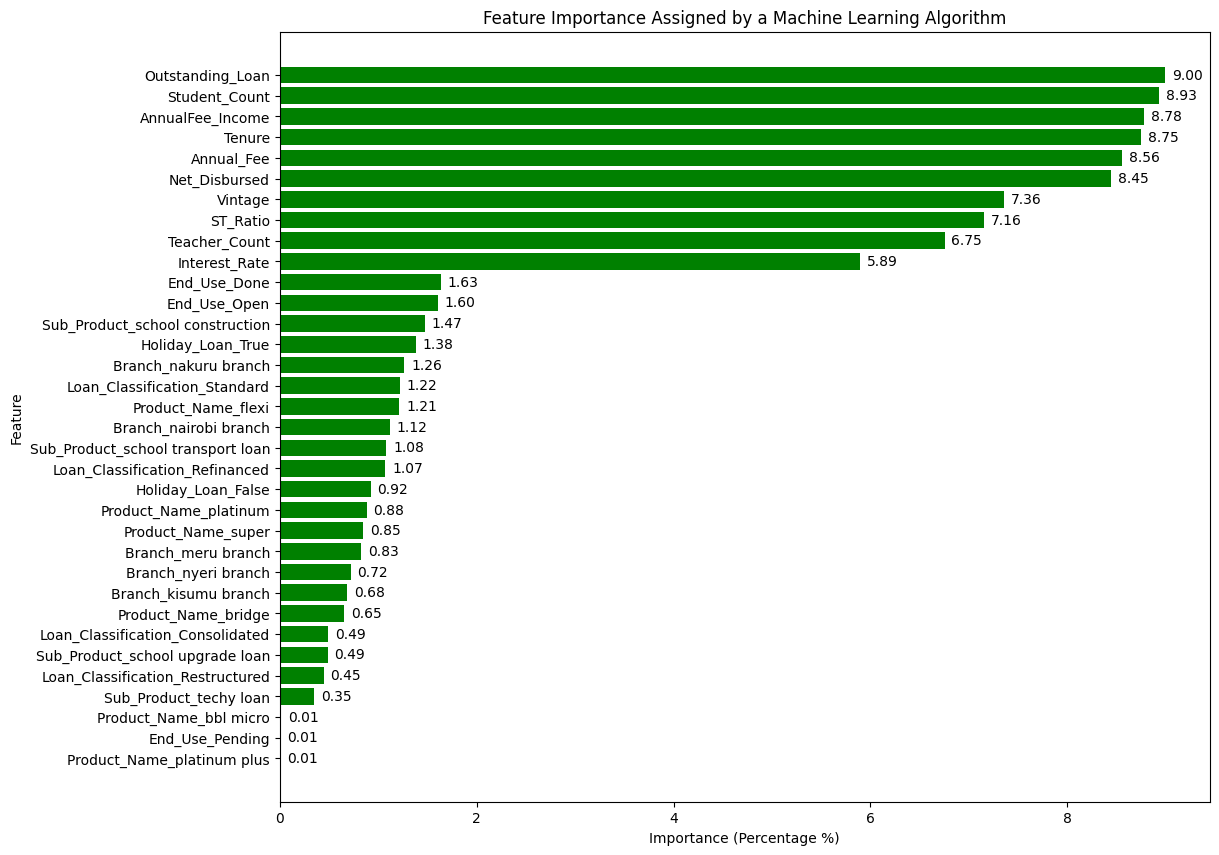

                              Feature  Importance
0                    Outstanding_Loan    0.089963
1                       Student_Count    0.089292
9                    AnnualFee_Income    0.087777
4                              Tenure    0.087521
8                          Annual_Fee    0.085550
3                       Net_Disbursed    0.084462
6                             Vintage    0.073560
7                            ST_Ratio    0.071552
2                       Teacher_Count    0.067517
5                       Interest_Rate    0.058913
27                       End_Use_Done    0.016350
28                       End_Use_Open    0.016026
21    Sub_Product_school construction    0.014737
26                  Holiday_Loan_True    0.013826
13               Branch_nakuru branch    0.012637
33       Loan_Classification_Standard    0.012167
17                 Product_Name_flexi    0.012140
12              Branch_nairobi branch    0.011156
22  Sub_Product_school transport loan    0.010814


In [7]:
#subsetting X and y
X=encoded_df1.drop('Default', axis=1)
y=encoded_df1['Default']
#Creating a randomforestclassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
#training the model
rf_classifier.fit(X, y)

# Calling feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#visualise
fig, ax=plt.subplots(figsize=(12,10))
importance_percentages = feature_importance_df['Importance']*100
bars=ax.barh(feature_importance_df['Feature'], importance_percentages, color = 'green') 
plt.xlabel('Importance (Percentage %)')
plt.ylabel('Feature')
plt.title('Feature Importance Assigned by a Machine Learning Algorithm')

# Annotate the bars with their importance scores
annotated_bars = []
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                textcoords='offset points', ha='left', va='center')
    annotated_bars.append(bar)

plt.gca().invert_yaxis()
plt.show()
print(feature_importance_df)

In [8]:
# Based on Random Classifier feature importance
optimal_df=encoded_df[['Outstanding_Loan', 'Student_Count','Annual_Fee', 'AnnualFee_Income', 'Teacher_Count', 'Net_Disbursed','Tenure', 'Interest_Rate', 'Vintage', 'ST_Ratio', 'Default']]
optimal_df

,Outstanding_Loan,Student_Count,Annual_Fee,AnnualFee_Income,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Default
0,69530,236,4050,955800,12,430000,9,28,14,20,1
1,134305,271,0,0,12,500000,36,26,13,23,1
2,140746,370,6000,2220000,17,1000000,36,24,11,22,1
3,291096,304,0,0,15,1000000,13,26,17,20,1
4,108596,416,0,0,13,350000,12,28,30,32,1
...,...,...,...,...,...,...,...,...,...,...,...
433,500000,320,12000,3840000,14,500000,36,39,7,23,0
434,650000,145,28950,4197750,12,650000,36,39,8,12,0
435,1388000,214,20250,4333500,10,354389,36,39,17,21,0
436,10000000,335,240000,80400000,25,3174167,60,26,7,13,0


In [9]:
# Where value = 0
optimal_df[optimal_df['AnnualFee_Income']==0.0]

,Outstanding_Loan,Student_Count,Annual_Fee,AnnualFee_Income,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio,Default
1,134305,271,0,0,12,500000,36,26,13,23,1
3,291096,304,0,0,15,1000000,13,26,17,20,1
4,108596,416,0,0,13,350000,12,28,30,32,1
5,86872,144,0,0,8,500000,9,28,17,18,1
6,44209,148,0,0,8,200000,9,28,13,19,1
23,135818,292,0,0,14,250000,24,27,12,21,1
29,445154,198,0,0,10,11834,33,28,17,20,1
30,13604,337,0,0,13,2879,1,31,17,26,1
56,584870,551,0,0,24,1030000,25,26,26,23,0
83,550456,484,0,0,18,569759,25,29,15,27,0


In [10]:
X = optimal_df.drop('Default', axis=1)
y = optimal_df['Default']

In [11]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Imputing 0 values with mean startegy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [13]:
# Convert the imputed array back to a DataFrame if needed
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X.columns)

In [14]:
print(X_train_imputed_df[X_train_imputed_df['AnnualFee_Income']==0.0])
print(X_test_imputed_df[X_test_imputed_df['AnnualFee_Income']==0.0])

     Outstanding_Loan  Student_Count  Annual_Fee  AnnualFee_Income  \
19           550456.0          484.0         0.0               0.0   
45            44209.0          148.0         0.0               0.0   
82           135818.0          292.0         0.0               0.0   
106          223833.0           44.0         0.0               0.0   
119           50992.0          317.0         0.0               0.0   
124          927469.0          132.0         0.0               0.0   
126          272371.0          300.0         0.0               0.0   
176          108596.0          416.0         0.0               0.0   
229          137182.0          995.0         0.0               0.0   
237          134305.0          271.0         0.0               0.0   
258          528000.0           44.0         0.0               0.0   
278          803513.0          292.0         0.0               0.0   
281         1177517.0          271.0         0.0               0.0   
294          440956.

In [15]:
# Replace 0.0 values in 'AnnualFee_Income' with median
mean_Annual_train = X_train_imputed_df[['AnnualFee_Income', 'Annual_Fee']].median(axis=0)
mean_Annual_test = X_test_imputed_df[['AnnualFee_Income', 'Annual_Fee']].median(axis=0)
X_train_imputed_df.loc[:, ['AnnualFee_Income', 'Annual_Fee']] = X_train_imputed_df[['AnnualFee_Income', 'Annual_Fee']].replace(0.0, mean_Annual_train)
X_test_imputed_df.loc[:, ['AnnualFee_Income', 'Annual_Fee']] = X_test_imputed_df[['AnnualFee_Income', 'Annual_Fee']].replace(0.0, mean_Annual_test)

In [16]:
print(X_train_imputed_df[X_train_imputed_df['Annual_Fee']==0.0])
print(X_train_imputed_df[X_train_imputed_df['AnnualFee_Income']==0.0])
print(X_test_imputed_df[X_test_imputed_df['Annual_Fee']==0.0])
print(X_test_imputed_df[X_test_imputed_df['AnnualFee_Income']==0.0])

Empty DataFrame
Columns: [Outstanding_Loan, Student_Count, Annual_Fee, AnnualFee_Income, Teacher_Count, Net_Disbursed, Tenure, Interest_Rate, Vintage, ST_Ratio]
Index: []
Empty DataFrame
Columns: [Outstanding_Loan, Student_Count, Annual_Fee, AnnualFee_Income, Teacher_Count, Net_Disbursed, Tenure, Interest_Rate, Vintage, ST_Ratio]
Index: []
Empty DataFrame
Columns: [Outstanding_Loan, Student_Count, Annual_Fee, AnnualFee_Income, Teacher_Count, Net_Disbursed, Tenure, Interest_Rate, Vintage, ST_Ratio]
Index: []
Empty DataFrame
Columns: [Outstanding_Loan, Student_Count, Annual_Fee, AnnualFee_Income, Teacher_Count, Net_Disbursed, Tenure, Interest_Rate, Vintage, ST_Ratio]
Index: []


In [17]:
# Scaling (standardize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed_df)
X_test_scaled = scaler.transform(X_test_imputed_df)


Random Forest Algorithim

In [18]:
# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(random_state=0)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

params = grid_search.best_params_

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(params)

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [19]:
# Create a Random Forest classifier instance
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=0)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance on training data
accuracy_train_rf = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on test data
accuracy_test_rf = accuracy_score(y_test, y_test_pred)

# Print the accuracy on both training and test data
print(f"Accuracy on Random Forest Training Data: {accuracy_train_rf*100}%")
print(f"Accuracy on Random Forest Test Data: {accuracy_test_rf*100}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_rf = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_rf = cross_val_scores_rf.mean()
std_cross_val_score_rf = cross_val_scores_rf.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_rf):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_rf:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_rf:.2f}")

Accuracy on Random Forest Training Data: 99.67320261437908%
Accuracy on Random Forest Test Data: 65.15151515151516%
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 69.35%
Fold 2: 50.82%
Fold 3: 54.10%
Fold 4: 57.38%
Fold 5: 63.93%
Mean Cross-Validation Score: 59.12%
Standard Deviation of Cross-Validation Scores: 6.71


Logistic Regression Algorithim

In [20]:

# Define the 'C' value for regularization
C_value = 1.0  # Adjust this value to control the strength of regularization

# Create a Logistic Regression classifier instance with the specified 'C' value
logistic_regression = LogisticRegression(C=C_value, random_state=0)

# Train the Logistic Regression model on the training data
logistic_regression.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = logistic_regression.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = logistic_regression.predict(X_test_scaled)

# Calculate accuracy for training data
accuracy_train_LR = accuracy_score(y_train, y_train_pred) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_LR = accuracy_score(y_test, y_test_pred) * 100  # Convert to percentage

# Print the accuracy on both training and test data as percentages
print(f"Logistic Regression - Accuracy on Training Data: {accuracy_train_LR:.2f}%")
print(f"Logistic Regression - Accuracy on Test Data: {accuracy_test_LR:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_LR = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_LR = cross_val_scores_LR.mean()
std_cross_val_score_LR = cross_val_scores_LR.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_LR):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_LR:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_LR:.2f}")

Logistic Regression - Accuracy on Training Data: 64.38%
Logistic Regression - Accuracy on Test Data: 65.15%
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 64.52%
Fold 2: 55.74%
Fold 3: 55.74%
Fold 4: 67.21%
Fold 5: 65.57%
Mean Cross-Validation Score: 61.76%
Standard Deviation of Cross-Validation Scores: 4.99


In [21]:
# Access the coefficients
coefficients = logistic_regression.coef_[0]

# You can pair coefficients with feature names if you have them
feature_names = X.columns  

# Create a DataFrame to display coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude to assess feature importance
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

coefficients_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
3,AnnualFee_Income,0.830127
9,ST_Ratio,0.293335
4,Teacher_Count,0.047336
6,Tenure,0.033478
8,Vintage,-0.067395
5,Net_Disbursed,-0.144633
2,Annual_Fee,-0.173916
0,Outstanding_Loan,-0.353229
7,Interest_Rate,-0.758045
1,Student_Count,-1.072972


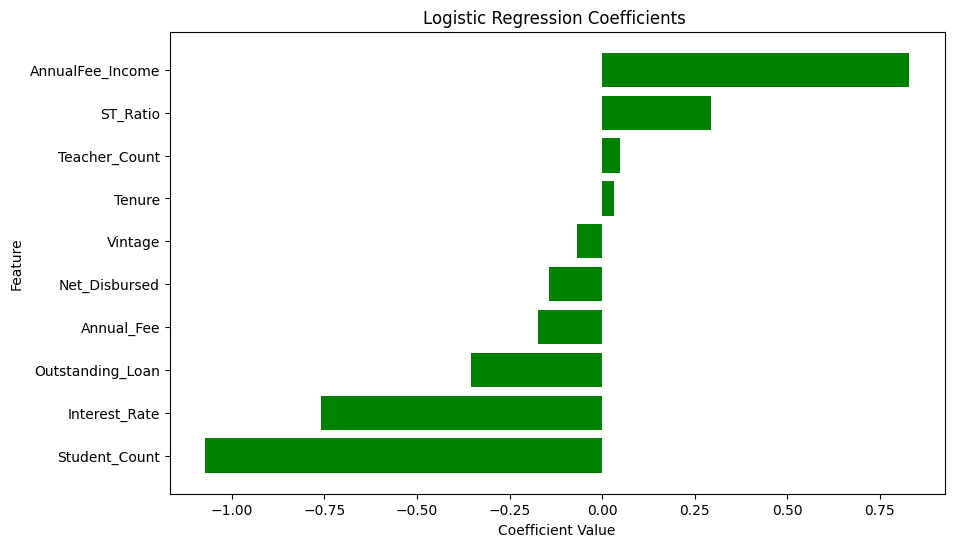

In [22]:
# Plotting
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients ')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest coefficient at the top
plt.show()

**Student_Count:** This means that a higher student count is associated with a lower likelihood of default.

**AnnualFee_Income:** This suggests that a higher annual fee relative to income is associated with a higher likelihood of default.

**Interest_Rate:**  This implies that higher interest rates are associated with a lower likelihood of default.

**Outstanding_Loan:** This indicates that a higher outstanding loan amount is associated with a lower likelihood of default.

**ST_Ratio:** This suggests that a higher student-teacher ratio is associated with a higher likelihood of default.

**Annual_Fee:** This indicates that a higher annual fee is associated with a lower likelihood of default.

**Net_Disbursed:** This suggests that a higher net disbursed amount is associated with a lower likelihood of default.

**Vintage:** This implies that older loans are associated with a lower likelihood of default.

**Teacher_Count:** This suggests that a higher teacher count is associated with a higher likelihood of default.

**Tenure:** This indicates that longer loan durations are associated with a higher likelihood of default.

K-Nearest Neighbor Algorithim

In [23]:
# Define the parameter grid for the grid search to assess best parameters for KNN Model
param_grid = {
    'n_neighbors': [3,5,7,8],
    'p': [1, 2, 3],
}

# Create a KNN classifier instance
knn_classifier = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_params

{'n_neighbors': 3, 'p': 1}

In [24]:
# Create a KNN classifier with the best hyperparameters
best_n_neighbors = best_params['n_neighbors']
best_p = best_params['p']
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=best_p)

# Train the KNN model on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred_knn = knn_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy for training data
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn) * 100  # Convert to percentage

# Print the accuracy on both training and test data as percentages
print(f"K-Nearest Neighbors - Accuracy on Training Data: {accuracy_train_knn:.2f}%")
print(f"K-Nearest Neighbors - Accuracy on Test Data: {accuracy_test_knn:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_knn = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_knn = cross_val_scores_knn.mean()
std_cross_val_score_knn = cross_val_scores_knn.std()

# Print cross-validation scores and statistics
print("K-Nearest Neighbors - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_knn):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_knn:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_knn:.2f}")

K-Nearest Neighbors - Accuracy on Training Data: 75.16%
K-Nearest Neighbors - Accuracy on Test Data: 68.18%
K-Nearest Neighbors - Cross-Validation Scores (Percentage):
Fold 1: 59.68%
Fold 2: 57.38%
Fold 3: 50.82%
Fold 4: 59.02%
Fold 5: 62.30%
Mean Cross-Validation Score: 57.84%
Standard Deviation of Cross-Validation Scores: 3.85


Extrene Gradient Boosting (XGBOOST) Algorithim

In [25]:
# Define the hyperparameters and their ranges for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier(random_state=42) 

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


In [26]:
# XGBoost classifier with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(**best_params, random_state=0)

# Train the optimized XGBoost model on the training data
best_xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred_xgb = best_xgb_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred_xgb = best_xgb_classifier.predict(X_test_scaled)

# Calculate accuracy for training data
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb) * 100  # Convert to percentage

print(f"XGBoost - Accuracy on Training Data: {accuracy_train_xgb:.2f}%")
print(f"XGBoost - Accuracy on Test Data: {accuracy_test_xgb:.2f}%")

# Calculate cross-validation scores (percentage)
cross_val_scores_xgb = cross_val_score(best_xgb_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_xgb = cross_val_scores_xgb.mean()
std_cross_val_score_xgb = cross_val_scores_xgb.std()

# Print cross-validation scores and statistics
print("XGBoost - Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_xgb):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_xgb:.2f}%")

XGBoost - Accuracy on Training Data: 82.68%
XGBoost - Accuracy on Test Data: 64.39%
XGBoost - Cross-Validation Scores (Percentage):
Fold 1: 62.90%
Fold 2: 59.02%
Fold 3: 45.90%
Fold 4: 59.02%
Fold 5: 67.21%
Mean Cross-Validation Score: 58.81%


Support Vector Machine (SVM) Algorithim

In [27]:
# Create an SVM model
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = svm_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = svm_classifier.predict(X_test_scaled)

# Calculate accuracy for training data
accuracy_train_svm = accuracy_score(y_train, y_train_pred) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_svm = accuracy_score(y_test, y_test_pred) * 100  # Convert to percentage

# Calculate cross-validation scores (percentage)
cross_val_scores_svm = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_svm = cross_val_scores_svm.mean()
std_cross_val_score_svm = cross_val_scores_svm.std()

# Print the accuracy on both training and test data as percentages
print(f"SVM - Accuracy on Training Data: {accuracy_train_svm:.2f}%")
print(f"SVM - Accuracy on Test Data: {accuracy_test_svm:.2f}%")

# Print cross-validation scores and statistics
print("Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_svm):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_svm:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_svm:.2f}")

SVM - Accuracy on Training Data: 66.99%
SVM - Accuracy on Test Data: 58.33%
Cross-Validation Scores (Percentage):
Fold 1: 59.68%
Fold 2: 57.38%
Fold 3: 55.74%
Fold 4: 67.21%
Fold 5: 63.93%
Mean Cross-Validation Score: 60.79%
Standard Deviation of Cross-Validation Scores: 4.23


Decision Tree Model

In [28]:
# Create an Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = dt_classifier.predict(X_train_scaled)

# Make predictions on the test data
y_test_pred = dt_classifier.predict(X_test_scaled)

# Calculate accuracy for training data
accuracy_train_dt = accuracy_score(y_train, y_train_pred) * 100  # Convert to percentage

# Calculate accuracy for test data
accuracy_test_dt = accuracy_score(y_test, y_test_pred) * 100  # Convert to percentage

# Calculate cross-validation scores (percentage)
cross_val_scores_dt = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') * 100

# Calculate mean and standard deviation of cross-validation scores
mean_cross_val_score_dt = cross_val_scores_dt.mean()
std_cross_val_score_dt = cross_val_scores_dt.std()

# Print the accuracy on both training and test data as percentages
print(f"SVM - Accuracy on Training Data: {accuracy_train_dt:.2f}%")
print(f"SVM - Accuracy on Test Data: {accuracy_test_dt:.2f}%")

# Print cross-validation scores and statistics
print("Cross-Validation Scores (Percentage):")
for i, score in enumerate(cross_val_scores_dt):
    print(f"Fold {i+1}: {score:.2f}%")

print(f"Mean Cross-Validation Score: {mean_cross_val_score_dt:.2f}%")
print(f"Standard Deviation of Cross-Validation Scores: {std_cross_val_score_dt:.2f}")

SVM - Accuracy on Training Data: 70.92%
SVM - Accuracy on Test Data: 59.09%
Cross-Validation Scores (Percentage):
Fold 1: 53.23%
Fold 2: 50.82%
Fold 3: 49.18%
Fold 4: 59.02%
Fold 5: 67.21%
Mean Cross-Validation Score: 55.89%
Standard Deviation of Cross-Validation Scores: 6.57


In [29]:
# Define the model names
model_names = ["Random Forest Algorithm", "Logistic Regression Algorithm", "K-Nearest Neighbors Algorithm", "XGBoost Algorithm", "SVM Algorithm", "Decision Tree"]

# Define the corresponding training, test accuracies, mean, and std for each model
training_accuracies = [accuracy_train_rf*100, accuracy_train_LR, accuracy_train_knn, accuracy_train_xgb, accuracy_train_svm, accuracy_train_dt]
test_accuracies = [accuracy_test_rf*100, accuracy_test_LR, accuracy_test_knn, accuracy_test_xgb, accuracy_test_svm, accuracy_test_dt]
mean_cross_val_scores = [mean_cross_val_score_rf, mean_cross_val_score_LR, mean_cross_val_score_knn, mean_cross_val_score_xgb, mean_cross_val_score_svm, cross_val_scores_dt]
std_cross_val_scores = [std_cross_val_score_rf, std_cross_val_score_LR, std_cross_val_score_knn, std_cross_val_score_xgb, std_cross_val_score_svm, std_cross_val_score_dt]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': training_accuracies,
    'Test Accuracy': test_accuracies,
    'Mean Cross-Validation Score': mean_cross_val_scores,
    'Std Deviation of Cross-Validation Scores': std_cross_val_scores
})

# Display the results DataFrame
print(results_df)

                           Model  Training Accuracy  Test Accuracy  \
0        Random Forest Algorithm          99.673203      65.151515   
1  Logistic Regression Algorithm          64.379085      65.151515   
2  K-Nearest Neighbors Algorithm          75.163399      68.181818   
3              XGBoost Algorithm          82.679739      64.393939   
4                  SVM Algorithm          66.993464      58.333333   
5                  Decision Tree          70.915033      59.090909   

                         Mean Cross-Validation Score  \
0                                          59.116869   
1                                          61.755685   
2                                          57.837123   
3                                          58.810153   
4                                          60.787943   
5  [53.2258064516129, 50.81967213114754, 49.18032...   

   Std Deviation of Cross-Validation Scores  
0                                  6.709408  
1                       

## Testing

In [34]:
X_train.head()

,Outstanding_Loan,Student_Count,Annual_Fee,AnnualFee_Income,Teacher_Count,Net_Disbursed,Tenure,Interest_Rate,Vintage,ST_Ratio
118,1119969,191,14250,2721750,6,1500000,41,36,4,32
114,88523,198,15750,3118500,8,600000,5,39,7,25
141,1320395,451,54000,24354000,22,1500000,72,36,18,21
209,4107179,450,67800,30510000,26,3822248,34,26,12,17
324,106193,271,19800,5365800,15,23848,9,28,15,18


In [81]:
input_data = (200000, 300, 10000, 500000, 10, 2000000, 60, 36, 24, 10)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The school wil not Default')
else:
  print('The school will default')

[0]
The school wil not Default


In [84]:
import pickle as pk
filename = 'model.sav'
pk.dump(knn_classifier, open(filename, 'wb'))

In [86]:
loaded_model = pk.load(open('model.sav', 'rb'))

In [87]:
loaded_model

KNeighborsClassifier(p=1)